# Clean Custom Dataset
You will now your clean your own dataset. Use the custom dataset you found in Lab 2.

---

## Collecting the Data 

Let's start by importing our libraries. 


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# TODO:: Import any other libraries you may need 


Load your dataset into your workspace by *right-clicking* the CustomDataset Folder on the left hand side and clicking "*Upload Here...*". If done properly, you should see your csv file within the CustomDataset folder, similar to the ExampleDatasets folder. 

Load your csv file into a pandas dataframe. 

In [2]:
# TODO:: load your .csv dataset into a dataframe
df = pd.read_csv("CustomDataset/WorldHappiness_Corruption_2015_2020.csv")



---


## Examine the Data

Let's use the *head* function to observe our data. 

In [3]:
# TODO:: Use the head function to observe the first five lines of the dataframe
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


Now, let's take a look at how large our dataset is. We'll do this using the shape attribute of the dataframe. The tuple consists of (row, columns). 

In [4]:
# TODO:: Use the shape member variable to observe the shape of our dataset. 
df.shape

(792, 13)

***Checkpoint***: How many rows does our data have? How many columns does our data have? 

792 rows, 13 columns

Now, let's get a summary of the dataframe so we can see if we have any null values in our dataframe. 

In [5]:
# TODO:: See a summary of the data to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


Let's find how many missing values we have in each column of our data. 

In [6]:
# TODO:: Check for missing values
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64



---



## Clean the Data

Are there any redundant columns in your dataset? Are there any columns you would like to remove? If so, go ahead and drop those columns. 

When we drop columns, we drop them based on their label. The *drop* function additionally takes two parameters. The first is the axis. When we set axis=0, we drop the columns based on their column index. This can be tricky and lead to errors, so we instead like to drop columns using their labels. We can do this by setting axis=1. The second parameter is inplace. When inplace=true, the dataframe is directly modified. When inplace=false, the modified dataframe is returned as a copy. For the purpose of this class, we'll be using inplace=true. However, if you ever need a copy of your modified dataframe, you could use inplace=false. 

In [7]:
# TODO:: Drop any redundant columns from your data
#even though there is no null data but the social support column has all 0s data
#it will not be beneficial to our data modeling --> drop it
df.drop(['social_support'], axis = 1, inplace = True)

We can check that these columns have been dropped by taking a look at the column labels we have left. Use the *columns* member variable to see what column labels exist in our dataframe. 

In [8]:
# TODO: View which column labels remain in the dataframe
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'cpi_score'],
      dtype='object')

Let's check the dataframe summary again using the *info* function. 

In [9]:
# TODO:: Check the summary again to see if there are any redundant columns remaining
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  cpi_score          792 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 74.4+ KB


Lastly, we can inspect the statistical information (e.g. mean, median, mode, etc.) of our dataset using the *describe* function. 

In [10]:
# TODO:: Inspect statistical information about the data set 
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,91.000000


Observe the labels for any categorical data that may exist in your dataset. Determine how many unique labels there are and if you need to drop any columns. 

In [11]:
# TODO::View the labels for any categorical variable
df.Country

0           Norway
1          Denmark
2          Iceland
3      Switzerland
4          Finland
          ...     
787       Botswana
788       Tanzania
789         Rwanda
790       Zimbabwe
791    Afghanistan
Name: Country, Length: 792, dtype: object

In [12]:
df.continent

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
787    Africa
788    Africa
789    Africa
790    Africa
791      Asia
Name: continent, Length: 792, dtype: object

In [13]:
# TODO:: View how many different labels there are for the categorical variable
num_cols = df._get_numeric_data().columns
set(df.columns) - set(num_cols)

{'Country', 'continent'}

Are there any columns you would like to drop? If so, follow the next steps to further clean your dataset. 

In [14]:
# TODO:: Write code to drop any additional columns
#I don't want to drop any other column

In [15]:
# TODO:: View a summary of the data set again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  cpi_score          792 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 74.4+ KB


In [16]:
#TODO: Write code to inspect the first five rows of the data frame
df.head(5)

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,90




---


# Entropy

You should now follow the steps shown in the tutorial notebooks to implement either the supervised learning or unsupervised learning approach on your own dataset. Choose which method to implement based on what you are trying to accomplish in your final project.

In [17]:
# TODO: Implement learning entropy-based method
#I choose decision_tree algorithm for this dataset
#import scipy and sklearn packages
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import graphviz

In [18]:
X = df.drop(columns = ['happiness_score', 'Country',"continent"])

In [19]:
happiness = df['happiness_score']
happiness

0      7.5370
1      7.5220
2      7.5040
3      7.4940
4      7.4690
        ...  
787    3.4789
788    3.4762
789    3.3123
790    3.2992
791    2.5669
Name: happiness_score, Length: 792, dtype: float64

In [20]:
y = round(happiness)
y

0      8.0
1      8.0
2      8.0
3      7.0
4      7.0
      ... 
787    3.0
788    3.0
789    3.0
790    3.0
791    3.0
Name: happiness_score, Length: 792, dtype: float64

Compute the entropy

In [21]:
# Compute the maximum entropy value
k = len(y.unique())
maxE = np.log2(k) 

p_data = y.value_counts(normalize=True) # calculates the probability of occurrence for each value in y
entropy = scipy.stats.entropy(p_data)   # calculates the entropy from p_data

# normalize the value to be between 0 and 1.
normalizedE = entropy/maxE

#TODO: Write code to display the entropy value
entropy

1.536974463984881

Finally, we train an entropy-based classifier on our dataset. This seeks to maximize the information gain of each decision boundary.

In [22]:
avg_score = 0.0
ntimes = 30

for i in range(ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction using entropy
    # Note: You can replace 'entropy' by 'gini' to get the classifier to use the gini index criterion.
    dec = DecisionTreeClassifier(criterion='entropy')
    model = dec.fit(X_train,y_train)
    predictions = model.predict(X_test)

    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score /= ntimes

In [23]:
X_test

,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,cpi_score
734,0.904873,0.000000,0.615788,0.355703,0.263886,0.046533,1.810528,2020,35
763,0.808262,0.000000,0.775857,0.378076,0.107226,0.104618,1.468162,2020,49
333,1.015000,0.000000,0.779000,0.497000,0.113000,0.101000,0.000000,2017,29
124,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,2015,17
552,1.151370,1.066120,0.697110,0.422840,0.109890,0.072960,3.129850,2019,45
...,...,...,...,...,...,...,...,...,...
168,0.745530,1.043560,0.644250,0.577330,0.274890,0.094720,2.742550,2016,28
40,0.909784,1.182125,0.596019,0.432453,0.078258,0.089981,2.714594,2015,39
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2015,91
88,1.027236,1.493011,0.557783,0.394144,0.338464,0.032902,1.111292,2015,39


In [24]:
y_test

734    5.0
763    5.0
333    5.0
124    4.0
552    7.0
      ... 
168    6.0
40     6.0
1      8.0
88     5.0
53     6.0
Name: happiness_score, Length: 159, dtype: float64

In [25]:
predictions

array([5., 5., 5., 4., 6., 7., 5., 5., 6., 6., 5., 5., 7., 5., 6., 4., 6.,
       6., 6., 6., 6., 6., 6., 7., 7., 6., 7., 7., 7., 4., 7., 7., 6., 5.,
       6., 6., 7., 5., 5., 4., 5., 5., 4., 5., 6., 5., 7., 6., 5., 5., 6.,
       6., 6., 5., 3., 4., 6., 6., 6., 4., 5., 6., 6., 7., 4., 5., 6., 4.,
       7., 8., 7., 5., 6., 7., 7., 7., 5., 6., 4., 6., 6., 7., 4., 6., 6.,
       4., 7., 4., 6., 6., 3., 5., 6., 4., 4., 7., 6., 7., 4., 7., 6., 4.,
       4., 4., 4., 5., 7., 6., 7., 7., 6., 5., 7., 5., 5., 3., 5., 5., 6.,
       5., 7., 4., 6., 7., 7., 7., 4., 4., 7., 4., 6., 6., 4., 6., 6., 6.,
       6., 6., 6., 7., 5., 5., 6., 6., 4., 4., 5., 5., 6., 4., 4., 6., 5.,
       6., 6., 6., 8., 4., 6.])

In [26]:
import matplotlib.pyplot as plt

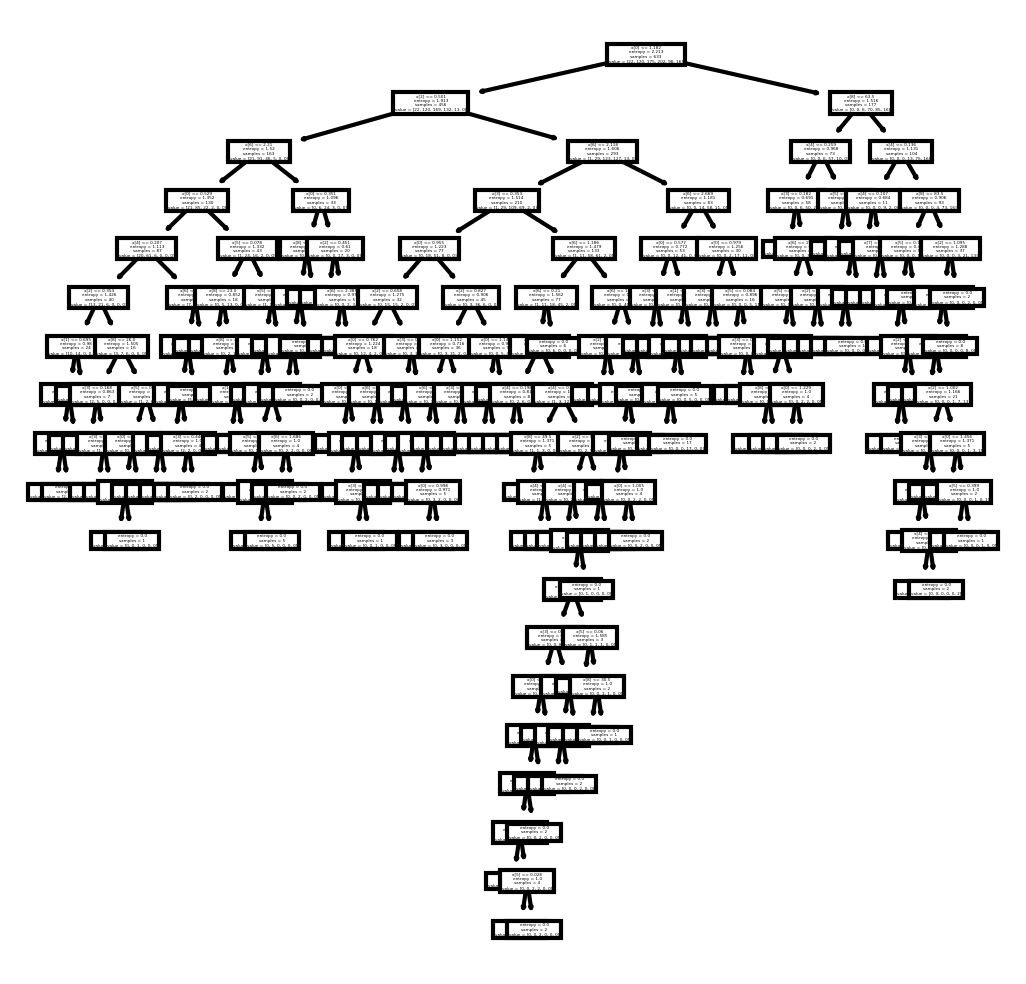

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
_ = tree.plot_tree(model)
fig.savefig('imagename.png')

In [28]:
_

[Text(0.6427396616541353, 0.9736842105263158, 'x[0] <= 1.182\nentropy = 2.213\nsamples = 633\nvalue = [22, 120, 175, 202, 98, 16]'),
 Text(0.4114191729323308, 0.9210526315789473, 'x[2] <= 0.501\nentropy = 1.913\nsamples = 456\nvalue = [22, 120, 169, 132, 13, 0]'),
 Text(0.22673872180451127, 0.868421052631579, 'x[6] <= 2.21\nentropy = 1.52\nsamples = 163\nvalue = [21, 91, 46, 5, 0, 0]'),
 Text(0.16024436090225563, 0.8157894736842105, 'x[0] <= 0.529\nentropy = 1.352\nsamples = 130\nvalue = [21, 85, 22, 2, 0, 0]'),
 Text(0.106203007518797, 0.7631578947368421, 'x[4] <= 0.207\nentropy = 1.113\nsamples = 87\nvalue = [20, 61, 6, 0, 0, 0]'),
 Text(0.05451127819548872, 0.7105263157894737, 'x[2] <= 0.354\nentropy = 1.426\nsamples = 40\nvalue = [13, 21, 6, 0, 0, 0]'),
 Text(0.03007518796992481, 0.6578947368421053, 'x[1] <= 0.695\nentropy = 0.98\nsamples = 24\nvalue = [10, 14, 0, 0, 0, 0]'),
 Text(0.022556390977443608, 0.6052631578947368, 'x[6] <= 0.754\nentropy = 0.991\nsamples = 18\nvalue = [10,

In [29]:
print('normalized entropy value: %.3f'% normalizedE)
print('average accuracy score: %.3f' % avg_score)


normalized entropy value: 0.595
average accuracy score: 0.649


In [30]:
df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'cpi_score'],
      dtype='object')

In [31]:
y = y.astype(str)

In [32]:
# output visual (can be visualized with visual code)
dot_data = tree.export_graphviz(model, out_file=None,
                    feature_names=['gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
        'Year', 'cpi_score'],
                    class_names=sorted(y.unique()),
                    filled=True)

graph = graphviz.Source(dot_data)
graph.render("Happiness_decision_tree",directory='CustomDataset')

'CustomDataset/Happiness_decision_tree.pdf'



---

# Observations
Did you have to clean your dataset? If yes, desribe what you did.



I delete the column: social support as it is the same for all rows (countries).
I also round the happiness score for the decision tree


What kinds of variables did you find in your dataset (i.e. categorical, continuous/discrete numerical)? List some examples of each kind you found.

All types in my dataset:
- categorical: country, continent
- discrete: year, cpi score
- continuous: the rest


Did the program run successfully? If yes, summarise the results, otherwise, describe what went wrong and your attempt(s) to fix it.


No, there is a bug in my code when I try to fit the data and create the model for it. I do not know how to fix it. Could you please help me with it? 